In [3]:
!pip install pegasuspy

  Obtaining dependency information for pegasuspy from https://files.pythonhosted.org/packages/58/6b/d6ea0aed8bbdd7cf5c4bb56df91fbc3caecf7d5738196e274684125ff871/pegasuspy-1.9.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for adjustText from https://files.pythonhosted.org/packages/86/68/2514c33e8afcdfb41eef05580e3c8ddb0f7d1fde7fbc84c9d3bb43286d53/adjustText-1.0.4-py3-none-any.whl.metadata
  Obtaining dependency information for Cython from https://files.pythonhosted.org/packages/f9/bd/e8a1d26d04c08a67bcc383f2ea5493a4e77f37a8770ead00a238b08ad729/Cython-3.0.8-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for demuxEM from https://files.pythonhosted.org/packages/cb/54/f5899a715ea233388a3df1488dc0e431f30dff7f514fb539224663eeee27/demuxEM-0.1.7-py3-none-any.whl.metadata
  Installing build dependencies ... done
  Getting requirements to buil

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pegasus as pg
from pegasusio import UnimodalData, MultimodalData

pd.set_option('display.max_columns', None)

/home/dsikdar/.conda/envs/r_env_431/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/dsikdar/.conda/envs/r_env_431/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/dsikdar/.conda/envs/r_env_431/lib/python3.10/site-packages/uma

In [12]:
#data = pg.read_input(f'/gpfs/gibbs/pi/girgenti/JZhang/CL/C2C/AD_Paper/Data/AMP-AD_ROSMAP_annotated.h5ad')
data = pg.read_input('/extra/zhanglab0/CommonData/AMP-AD/AMP-AD_restricted/AMP-AD_ROSMAP_annotated.h5ad')

#meta = pd.read_csv('/gpfs/gibbs/pi/girgenti/JZhang/CL/C2C/AD_Paper/Data/meta_withDisorderInfo.csv', index_col=0)
meta = pd.read_csv('/extra/zhanglab0/CommonData/AMP-AD/AMP-AD_restricted/meta_withDisorderInfo.csv', index_col=0)
meta.set_index(keys="barcodekey", inplace=True)
meta = meta["Disorder"]
data.obs = data.obs.merge(meta, left_index=True, right_index=True)

2024-02-27 10:56:20,622 - pegasusio.readwrite - INFO - h5ad file '/extra/zhanglab0/CommonData/AMP-AD/AMP-AD_restricted/AMP-AD_ROSMAP_annotated.h5ad' is loaded.
2024-02-27 10:56:20,623 - pegasusio.readwrite - INFO - Function 'read_input' finished in 31.46s.


In [13]:
barcode_list = []
for ii,name in enumerate(data.obs_names):
    if data.obs.Disorder[ii] == 'cognitive impairment':
        barcode_list.append(False)
    else:
        barcode_list.append(True)
data_subset = data[barcode_list].copy()
data = MultimodalData(data_subset)
data

AttributeError: 'MultimodalData' object has no attribute 'get_uid'

In [14]:
data.obs['subclass'].replace(to_replace=['L5 ET', 'L5 IT'], value=["L5", "L5"], inplace=True)
data.obs.head()

,n_genes,n_counts,Channel,anno,subclass,azimuth,sampleID,individualID,Disorder
barcodekey,,,,,,,,,
D17-8753-TGCGCAGCATCGGGTC,10905,66946,D17-8753-,L5 ET,L2/3 IT,L2/3 IT,D17-8753,ROS13,cognitive impairment
D17-8753-CTCGAAACATCGACGC,10375,59114,D17-8753-,L5 ET,L6 IT,L6 IT,D17-8753,ROS13,cognitive impairment
D17-8753-TGCGCAGGTATCGCAT,10518,58903,D17-8753-,L5 ET,L6 IT,L6 IT,D17-8753,ROS13,cognitive impairment
D17-8753-GTTACAGCACATTAGC,10268,49493,D17-8753-,L5 ET,L2/3 IT,L2/3 IT,D17-8753,ROS13,cognitive impairment
D17-8753-TCCCGATCAATGTTGC,9969,48719,D17-8753-,L5 IT-5,L6 IT,L6 IT,D17-8753,ROS13,cognitive impairment


# Fig A,B: cell count and UMAP

In [15]:
data.obs.pivot_table(values="individualID", columns="Disorder", aggfunc="nunique")

Disorder,Alzheimers/dementia,cognitive impairment,control
individualID,23,10,13


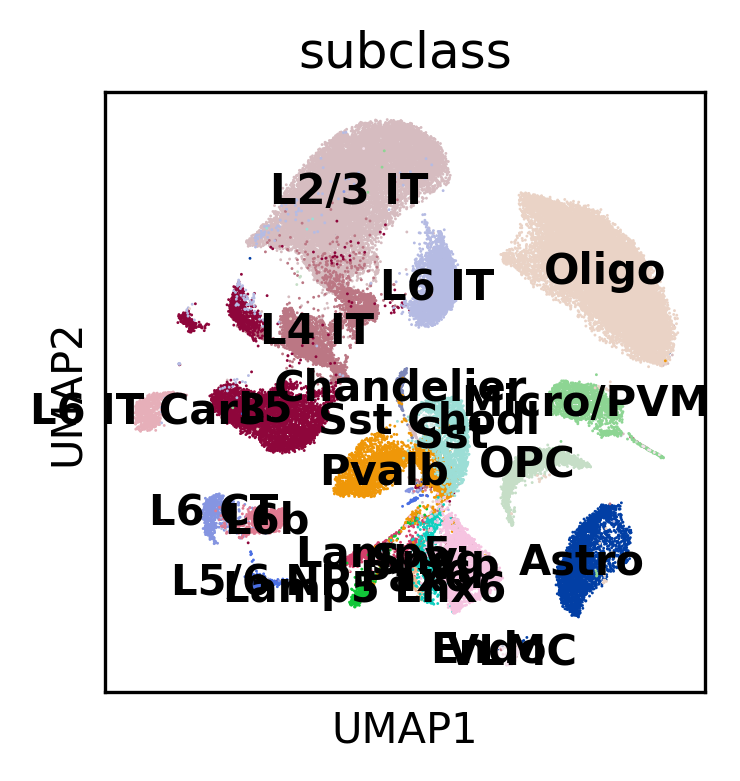

In [19]:
f = pg.scatter(data, attrs=['subclass'], legend_loc=['on data'], panel_size=(2,2), return_fig=True)
plt.show()

#f.savefig("plots-alz_inflam/UMAP.pdf", bbox_inches='tight')
f.savefig("UMAP.pdf", bbox_inches='tight')

# Fig C: marker gene

## Individual

In [20]:
pg.de_analysis(data, cluster="subclass")

2024-02-27 10:58:58,471 - pegasus.tools.diff_expr - INFO - CSR matrix is converted to CSC matrix. Time spent = 4.8944s.


/home/dsikdar/.conda/envs/r_env_431/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/dsikdar/.conda/envs/r_env_431/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/dsikdar/.conda/envs/r_env_431/lib/python3.10/site-packages/uma

calc_mwu finished for genes in [1771, 2024).
calc_mwu finished for genes in [26978, 27230).
calc_mwu finished for genes in [2024, 2277).
calc_mwu finished for genes in [26474, 26726).
calc_mwu finished for genes in [759, 1012).
calc_mwu finished for genes in [25214, 25466).
calc_mwu finished for genes in [506, 759).
calc_mwu finished for genes in [25718, 25970).
calc_mwu finished for genes in [1518, 1771).
calc_mwu finished for genes in [25466, 25718).
calc_mwu finished for genes in [0, 253).
calc_mwu finished for genes in [26222, 26474).
calc_mwu finished for genes in [1012, 1265).
calc_mwu finished for genes in [27230, 27482).
calc_mwu finished for genes in [253, 506).
calc_mwu finished for genes in [26726, 26978).
calc_mwu finished for genes in [1265, 1518).
calc_mwu finished for genes in [25970, 26222).


Process LokyProcess-55:
Process LokyProcess-57:
    self._dispose()
  File "/home/dsikdar/.conda/envs/r_env_431/lib/python3.10/site-packages/llvmlite/binding/ffi.py", line 324, in _dispose
Process LokyProcess-27:
Process LokyProcess-15:
Process LokyProcess-16:
Process LokyProcess-81:
Process LokyProcess-73:
Process LokyProcess-65:
Process LokyProcess-75:
    def _dispose(self):
KeyboardInterrupt: 
Process LokyProcess-12:
Traceback (most recent call last):
  File "/home/dsikdar/.conda/envs/r_env_431/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py", line 426, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
  File "/home/dsikdar/.conda/envs/r_env_431/lib/python3.10/multiprocessing/queues.py", line 122, in get
    return _ForkingPickler.loads(res)
  File "/home/dsikdar/.conda/envs/r_env_431/lib/python3.10/site-packages/pegasus/__init__.py", line 26, in <module>
    from demuxEM import estimate_background_probs, demultiplex, attach_demux

KeyboardInterrupt: 

In [ ]:
data.obs.subclass.unique()

In [ ]:
gene_list = ["AQP4", "GJA1", 
             "FLT1", "CLDN5", 
             "APBB1IP", "CX3CR1", 
             "MOBP", "MOG", 
             "OLIG1", "OLIG2", 
             "COLEC12", "EBF1", 
             "GAD1", "GAD2", 
             "SLC17A7", "SATB2"]

In [ ]:
result = []
for group in [[x+"_CON", x+"_ALZ"] for x in ["Astro","Endo","Micro/PVM","Oligo","OPC","VLMC",
                             "Chandelier","Lamp5","Lamp5 Lhx6","Pax6","Pvalb","Sncg","Sst", "Sst Chodl","Vip",
                             "L2/3 IT","L4 IT","L5","L5/6 NP","L6 CT","L6 IT","L6 IT Car3","L6b"]]:
    result.append(group[0])
    result.append(group[1])

In [ ]:
cluster_expr_CON

In [ ]:
cluster_expr = pg.search_genes(data, gene_list=gene_list, measure='log2Mean')
cluster_expr.columns = cluster_expr.columns.str.replace(r":log2Mean", "")
cluster_expr = cluster_expr[["Astro","Endo","Micro/PVM","Oligo","OPC","VLMC",
                             "Chandelier","Lamp5","Lamp5 Lhx6","Pax6","Pvalb","Sncg","Sst", "Sst Chodl","Vip",
                             "L2/3 IT","L4 IT","L5","L5/6 NP","L6 CT","L6 IT","L6 IT Car3","L6b"]]

# # cluster_expr_DIS = pg.search_genes(data_DIS, gene_list=gene_list, measure='log2Mean')
# # cluster_expr_DIS.columns = cluster_expr_DIS.columns.str.replace(r":log2Mean", "")
# # cluster_expr_DIS = cluster_expr_DIS[["Astro","Endo","Micro/PVM","Oligo","OPC","VLMC",
# #                              "Chandelier","Lamp5","Lamp5 Lhx6","Pax6","Pvalb","Sncg","Sst", "Sst Chodl","Vip",
# #                              "L2/3 IT","L4 IT","L5","L5/6 NP","L6 CT","L6 IT","L6 IT Car3","L6b"]]

# cluster_expr = cluster_expr_CON.merge(cluster_expr_DIS, left_index=True, right_index=True)
# cluster_expr.columns = cluster_expr.columns.str.replace(r"_x", "_CON")
# cluster_expr.columns = cluster_expr.columns.str.replace(r"_y", "_ALZ")
# cluster_expr = cluster_expr[result]

cluster_expr

In [ ]:
cluster_expr.to_csv("subclass_markerExpr.csv", sep=",")

/home/dsikdar/.conda/envs/r_env_431/lib/python3.10/site-packages/umap/umap_.py:660: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/dsikdar/.conda/envs/r_env_431/lib/python3.10/site-packages/umap/umap_.py:660: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/dsikdar/.conda/envs/r_env_431/lib/python3.10/site-packages/umap/umap_.py

## Separated

In [18]:
data_CON = data[data.obs["Disorder"] == "control"].copy()
data_DIS = data[data.obs["Disorder"] == "Alzheimers/dementia"].copy()

In [19]:
pg.de_analysis(data_CON, cluster="subclass")
pg.de_analysis(data_DIS, cluster="subclass")

2024-02-16 15:19:06,985 - pegasus.tools.diff_expr - INFO - CSR matrix is converted to CSC matrix. Time spent = 0.7199s.
2024-02-16 15:19:25,805 - pegasus.tools.diff_expr - INFO - MWU test and AUROC calculation are finished. Time spent = 18.8201s.
2024-02-16 15:19:25,930 - pegasus.tools.diff_expr - INFO - Sufficient statistics are collected. Time spent = 0.1246s.
2024-02-16 15:19:26,027 - pegasus.tools.diff_expr - INFO - Differential expression analysis is finished.
2024-02-16 15:19:26,027 - pegasus.tools.diff_expr - INFO - Function 'de_analysis' finished in 19.78s.
2024-02-16 15:19:27,069 - pegasus.tools.diff_expr - INFO - CSR matrix is converted to CSC matrix. Time spent = 1.0403s.
2024-02-16 15:19:28,585 - pegasus.tools.diff_expr - INFO - MWU test and AUROC calculation are finished. Time spent = 1.5154s.
2024-02-16 15:19:28,738 - pegasus.tools.diff_expr - INFO - Sufficient statistics are collected. Time spent = 0.1531s.
2024-02-16 15:19:28,830 - pegasus.tools.diff_expr - INFO - Diffe

In [20]:
gene_list = ["AQP4", "GJA1", 
             "FLT1", "CLDN5", 
             "APBB1IP", "CX3CR1", 
             "MOBP", "MOG", 
             "OLIG1", "OLIG2", 
             "COLEC12", "EBF1", 
             "GAD1", "GAD2", 
             "SLC17A7", "SATB2"]

In [21]:
result = []
for group in [[x+"_CON", x+"_ALZ"] for x in ["Astro","Endo","Micro/PVM","Oligo","OPC","VLMC",
                             "Chandelier","Lamp5","Lamp5 Lhx6","Pax6","Pvalb","Sncg","Sst", "Sst Chodl","Vip",
                             "L2/3 IT","L4 IT","L5","L5/6 NP","L6 CT","L6 IT","L6 IT Car3","L6b"]]:
    result.append(group[0])
    result.append(group[1])

In [25]:
cluster_expr_CON

,Astro:log2Mean,Chandelier:log2Mean,Endo:log2Mean,L2/3 IT:log2Mean,L4 IT:log2Mean,L5:log2Mean,L5/6 NP:log2Mean,L6 CT:log2Mean,L6 IT:log2Mean,L6 IT Car3:log2Mean,L6b:log2Mean,Lamp5:log2Mean,Lamp5 Lhx6:log2Mean,Micro/PVM:log2Mean,OPC:log2Mean,Oligo:log2Mean,Pax6:log2Mean,Pvalb:log2Mean,Sncg:log2Mean,Sst:log2Mean,Sst Chodl:log2Mean,VLMC:log2Mean,Vip:log2Mean
featurekey,,,,,,,,,,,,,,,,,,,,,,,
AQP4,4.901392,0.046852,0.000000,0.350674,0.243149,0.217631,0.141144,0.065836,0.301507,0.166601,0.171741,0.014668,0.300111,0.063570,0.095796,0.004459,0.125741,0.034506,0.050029,0.017507,0.000000,0.000000,0.100720
GJA1,4.782771,0.045551,1.031118,0.008843,0.021564,0.006339,0.033017,0.000000,0.046211,0.044500,0.091765,0.000000,0.000000,0.037376,0.042230,0.010348,0.000000,0.025324,0.000000,0.006327,0.000000,0.939097,0.025705
FLT1,0.004722,0.000000,7.030376,0.037357,0.038361,0.045369,0.051485,0.012744,0.046175,0.078367,0.031302,0.042413,0.024708,0.110986,0.045219,0.011646,0.130139,0.174689,0.017433,0.171266,0.000000,0.760242,0.243872
CLDN5,0.016645,0.000000,8.646247,0.000000,0.003283,0.001378,0.000000,0.012900,0.001959,0.000000,0.047453,0.012261,0.000000,0.000000,0.000000,0.001041,0.000000,0.002866,0.000000,0.000000,0.000000,0.477631,0.000000
APBB1IP,0.030013,0.125382,0.000000,0.040336,0.031188,0.060143,0.050710,0.042258,0.044592,0.043664,0.040057,0.103941,0.142659,5.559642,0.049880,0.015313,0.000000,0.191609,0.037439,0.028423,0.000000,0.126833,0.048448
CX3CR1,0.009194,0.000000,0.000000,0.004856,0.000000,0.002397,0.000000,0.000000,0.004905,0.000000,0.011220,0.012185,0.000000,2.112428,0.012110,0.003436,0.000000,0.003490,0.026747,0.000000,0.000000,0.151419,0.000000
MOBP,0.123943,0.000000,0.000000,0.182952,0.178023,0.218961,0.331365,0.066728,0.246647,0.208934,0.107586,0.146245,0.160180,0.121995,0.047830,4.636469,0.069822,0.173183,0.061185,0.113149,1.508757,0.000000,0.047160
MOG,0.042542,0.044044,0.000000,0.010221,0.019984,0.040075,0.035502,0.035307,0.035911,0.023008,0.047829,0.039656,0.103895,0.046810,0.177169,2.696379,0.060436,0.059826,0.065966,0.014552,1.541371,0.000000,0.007784
OLIG1,0.502642,0.132792,0.000000,0.015536,0.043823,0.059257,0.099480,0.051999,0.029494,0.032289,0.064535,0.059258,0.022924,0.010811,4.407174,1.925437,0.154876,0.122227,0.045917,0.042758,0.000000,0.000000,0.033039


In [24]:
cluster_expr_CON = pg.search_genes(data_CON, gene_list=gene_list, measure='log2Mean')
# cluster_expr_CON.columns = cluster_expr_CON.columns.str.replace(r":log2Mean", "")
# cluster_expr_CON = cluster_expr_CON[["Astro","Endo","Micro/PVM","Oligo","OPC","VLMC",
#                              "Chandelier","Lamp5","Lamp5 Lhx6","Pax6","Pvalb","Sncg","Sst", "Sst Chodl","Vip",
#                              "L2/3 IT","L4 IT","L5","L5/6 NP","L6 CT","L6 IT","L6 IT Car3","L6b"]]

# cluster_expr_DIS = pg.search_genes(data_DIS, gene_list=gene_list, measure='log2Mean')
# cluster_expr_DIS.columns = cluster_expr_DIS.columns.str.replace(r":log2Mean", "")
# cluster_expr_DIS = cluster_expr_DIS[["Astro","Endo","Micro/PVM","Oligo","OPC","VLMC",
#                              "Chandelier","Lamp5","Lamp5 Lhx6","Pax6","Pvalb","Sncg","Sst", "Sst Chodl","Vip",
#                              "L2/3 IT","L4 IT","L5","L5/6 NP","L6 CT","L6 IT","L6 IT Car3","L6b"]]

# cluster_expr = cluster_expr_CON.merge(cluster_expr_DIS, left_index=True, right_index=True)
# cluster_expr.columns = cluster_expr.columns.str.replace(r"_x", "_CON")
# cluster_expr.columns = cluster_expr.columns.str.replace(r"_y", "_ALZ")
# cluster_expr = cluster_expr[result]

# cluster_expr

In [125]:
cluster_expr.to_csv("subclass_markerExpr.csv", sep=",")

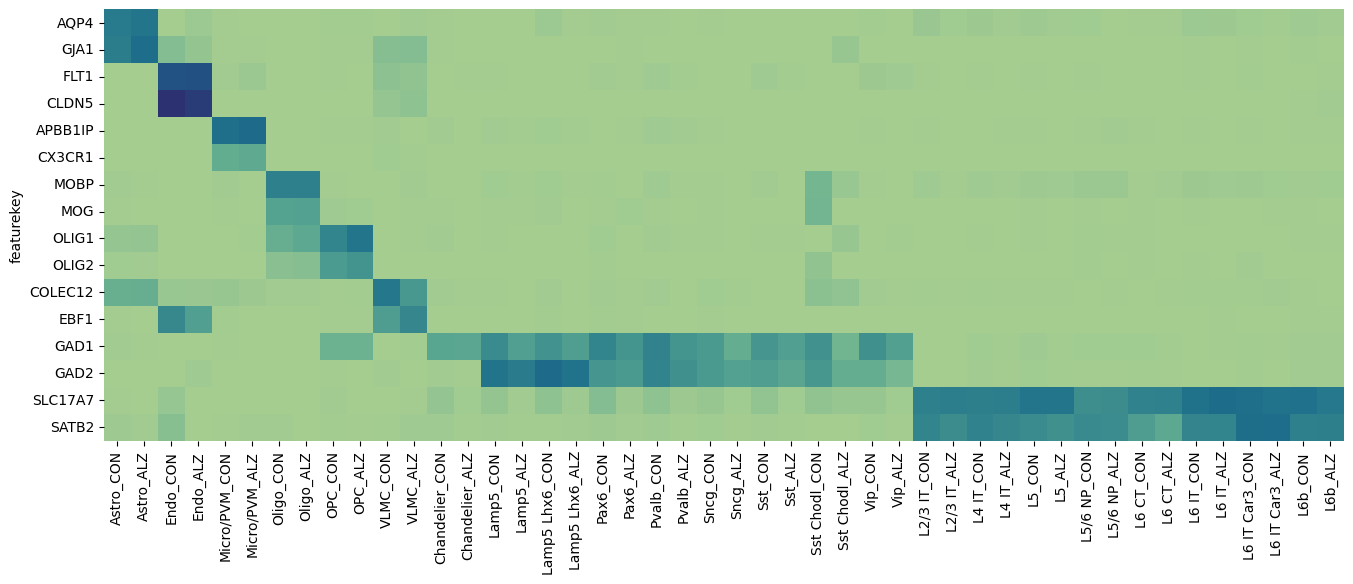

In [124]:
fig, ax = plt.subplots(figsize=(16, 46))

sns.heatmap(cluster_expr, cmap="crest", square=True, cbar=False)
fig.show()

# fig.savefig("plots-alz_inflam/marker_genes.pdf", bbox_inches='tight')

# Fig E: 3-dim c2c data structure

In [7]:
matrix = np.random.rand(22, 22)

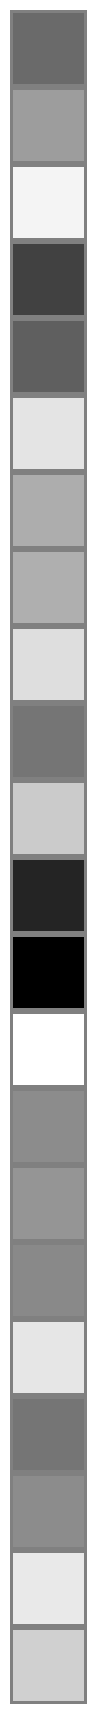

In [8]:
fig, ax = plt.subplots(figsize=(22, 22))

sns.heatmap(matrix[:, 21].reshape((22, 1)), cmap="gray", square=True, cbar=False, 
            linewidths=3, linecolor='gray', xticklabels=False, yticklabels=False)
fig.show()

fig.savefig("/home/cl2553/project/C2C/plots/figA-alz_inflam-C2C_data_structure_col.pdf", bbox_inches='tight')

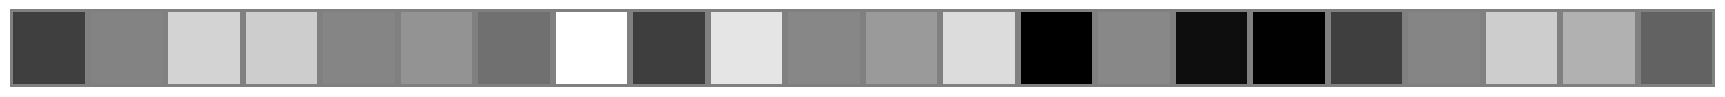

In [9]:
fig, ax = plt.subplots(figsize=(22, 22))

sns.heatmap(matrix[0, :].reshape((1, 22)), cmap="gray", square=True, cbar=False, 
            linewidths=3, linecolor='gray', xticklabels=False, yticklabels=False)
fig.show()

fig.savefig("/home/cl2553/project/C2C/plots/figA-alz_inflam-C2C_data_structure_row.pdf", bbox_inches='tight')

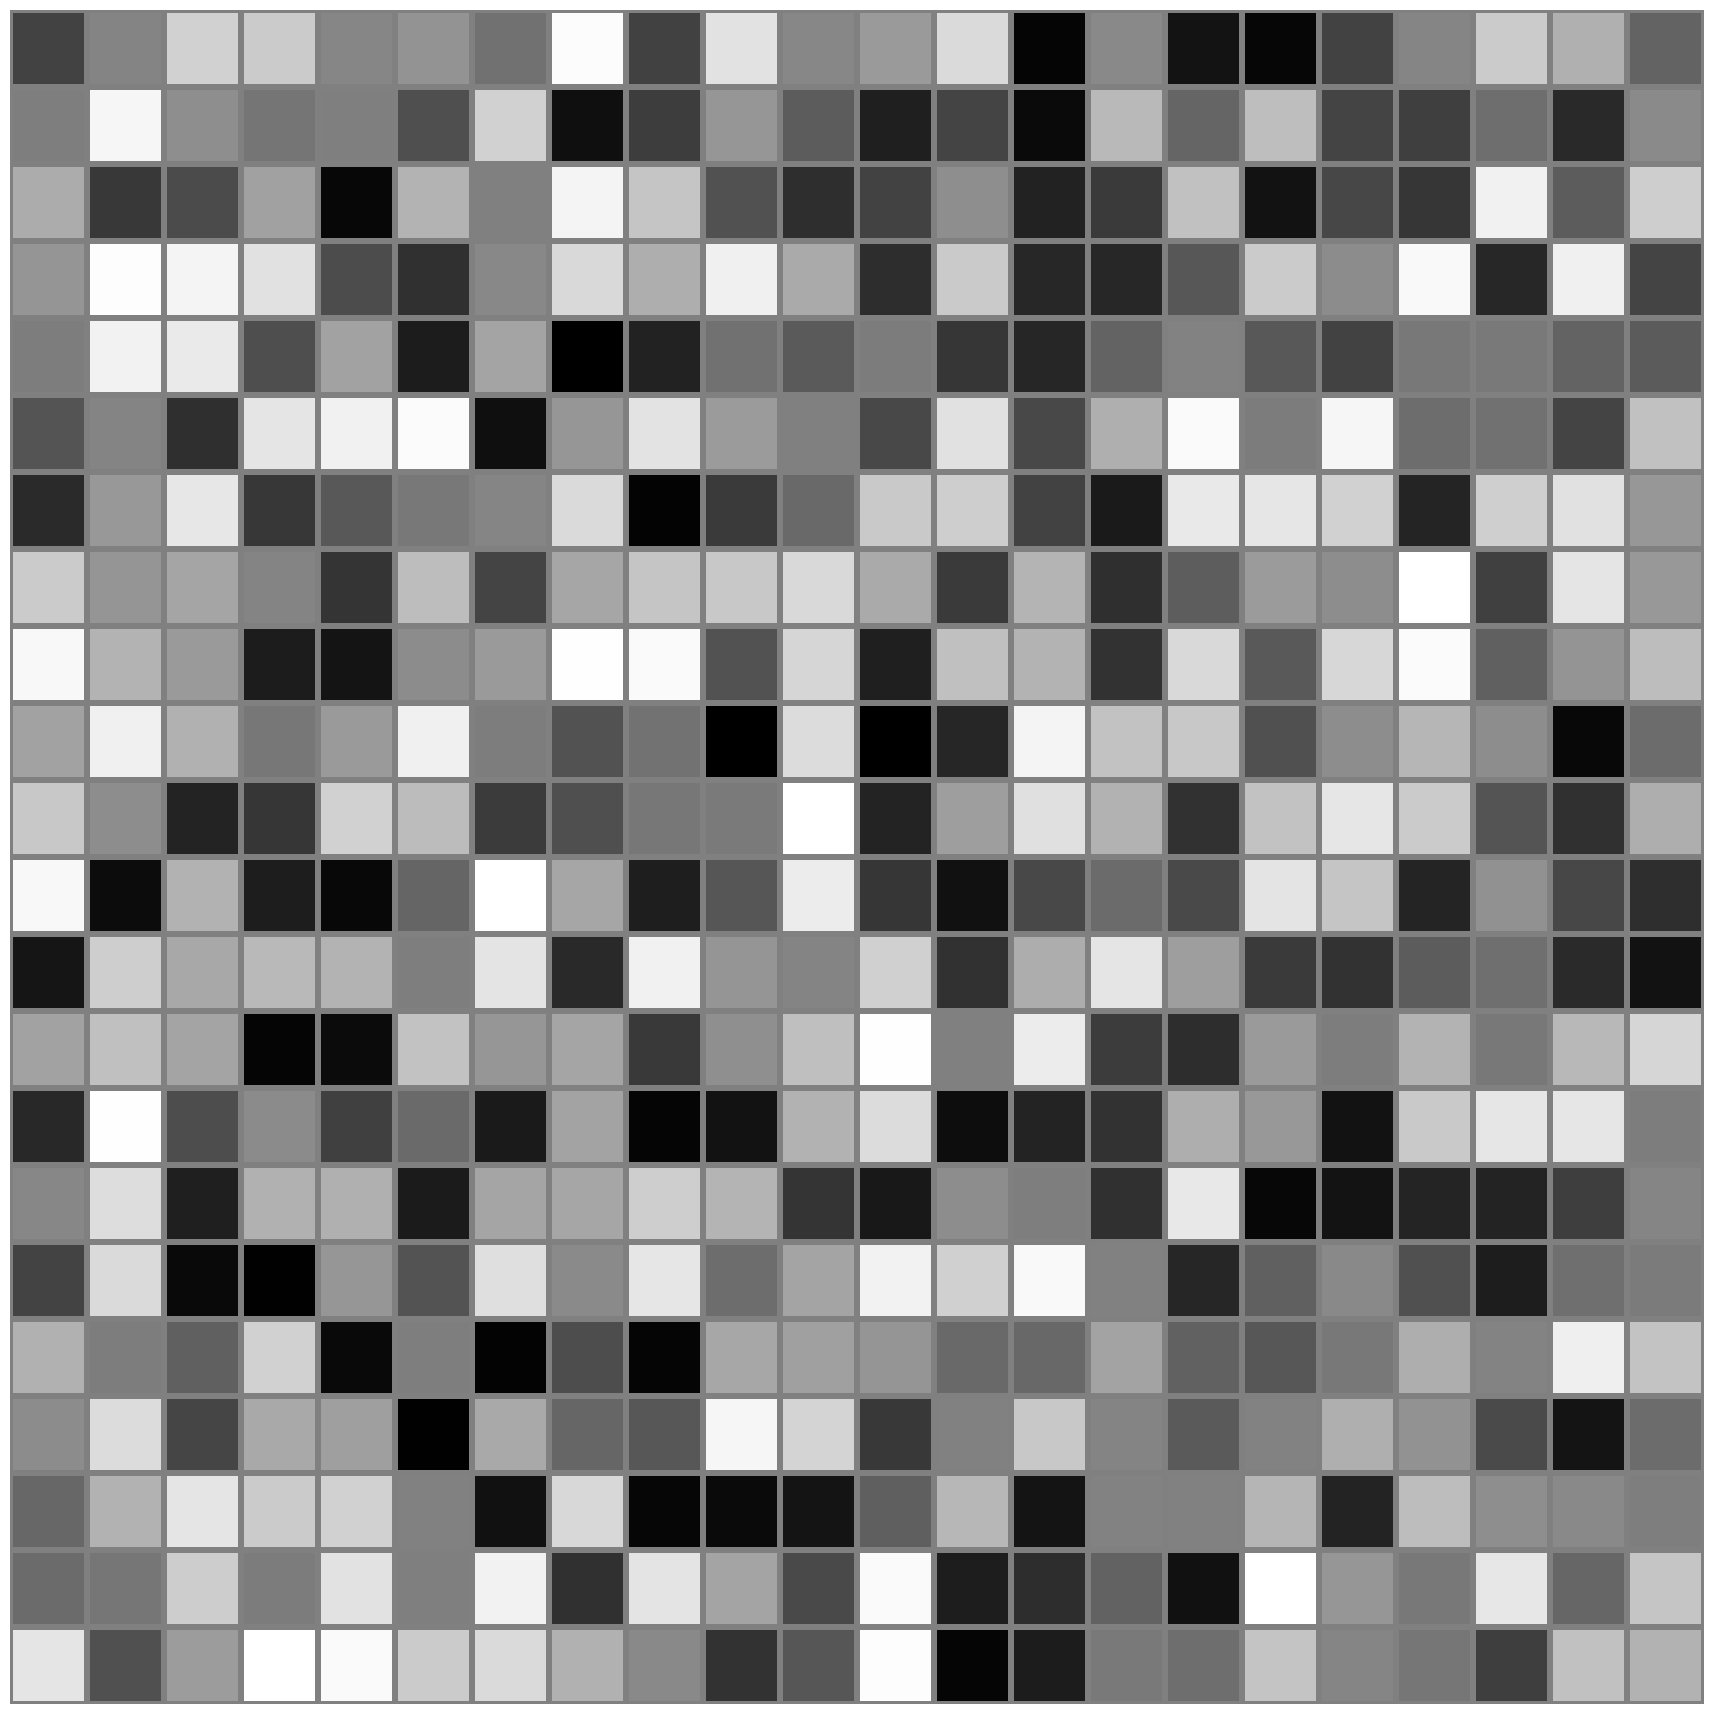

In [10]:
fig, ax = plt.subplots(figsize=(22, 22))

sns.heatmap(matrix, cmap="gray", square=True, cbar=False, 
            linewidths=3, linecolor='gray', xticklabels=False, yticklabels=False)
fig.show()

fig.savefig("/home/cl2553/project/C2C/plots/figA-alz_inflam-C2C_data_structure.pdf", bbox_inches='tight')
# fig.savefig("/home/cl2553/project/C2C/plots-alz_inflam/E-C2C_data_structure.pdf", bbox_inches='tight')

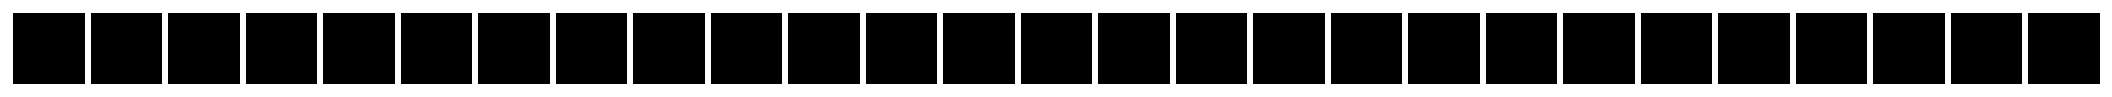

In [8]:
fig, ax = plt.subplots(figsize=(27, 27))

sns.heatmap(np.ones((1, 27)), cmap="gray", square=True, cbar=False, 
            linewidths=3, linecolor='white', xticklabels=False, yticklabels=False)
fig.show()

fig.savefig("/home/cl2553/project/C2C/plots/figA-alz_inflam-C2C_data_structure_legend.pdf", bbox_inches='tight')
# fig.savefig("/home/cl2553/project/C2C/plots-alz_inflam/E-C2C_data_structure.pdf", bbox_inches='tight')